In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm

In [9]:
data = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/I7 HO2_OH.csv')

In [10]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [11]:
data

,region,beta_adj,beta_adj_ste,co_hcho__no,co_hcho__no_ste,ln_beta_adj,ln_co_hcho__no,ln_beta_adj_ste,ln_co_hcho__no_ste
0,AUS,7.582998,0.504224,4.933822,0.401938,2.025909,1.596114,-0.684734,-0.911457
1,BRA,44.304068,1.550559,42.427860,2.170921,3.791077,3.747805,0.438615,0.775151
2,BTH,1.323723,0.011399,0.287005,0.015538,0.280448,-1.248257,-4.474186,-4.164480
3,CA,2.562641,0.124942,0.949017,0.108560,0.941038,-0.052328,-2.079903,-2.220455
4,CCE,3.193008,0.111034,2.494262,0.305533,1.160964,0.913993,-2.197922,-1.185697
5,COD,36.100959,2.023979,46.589427,2.798356,3.586319,3.841374,0.705066,1.029032
6,DEU,2.874848,0.071490,1.209242,0.082293,1.056000,0.189993,-2.638203,-2.497468
7,FIN,11.889885,0.710823,7.645549,0.805373,2.475688,2.034124,-0.341331,-0.216450
8,FRA,5.400233,0.114697,3.490544,0.131792,1.686442,1.250058,-2.165461,-2.026530
9,GBA,2.445743,0.112885,1.318135,0.200013,0.894349,0.276218,-2.181386,-1.609373


In [12]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

In [13]:
mod = LinearRegression()
X = data[['ln_beta_adj']]
y = data['ln_co_hcho__no']
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[1.3271249]
-1.0750034104118396
0.9582671338616642
0.24956642297928808


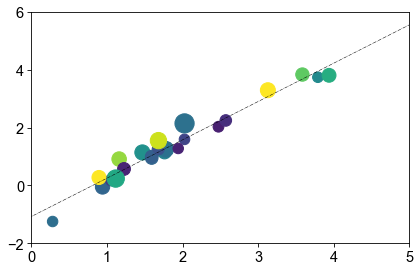

In [25]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = data['ln_beta_adj']
y = data['ln_co_hcho__no']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-2,6,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([0,5])
plt.ylim([-2,6])
plt.yticks([-2,0,2,4,6], fontsize=14)
plt.xticks([0,1,2,3,4,5], fontsize=14)

plt.savefig("Fig. 3i d_HO2_OH.pdf", format="pdf", bbox_inches="tight")